# MNIST hand written digit reading with a 2D convolutinal neural network

In [2]:
pip install tensorflow numpy mnist

In [3]:
import numpy as np
from tensorflow import keras
import mnist

# Get train images and corresponding labels
train_images = mnist.train_images()
train_labels = mnist.train_labels()

# Get test images and corresponding labels
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Print image and label arrays' shapes
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Normalizing images
train_images  = train_images/255
test_images  = test_images/255

# Reshaping images
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

n_filters = 8
filter_size = 3
pool_size=2

# Model building
model = Sequential([
                    Conv2D(n_filters, filter_size, input_shape=(28,28,1), activation="relu"),
                    MaxPooling2D(pool_size),
                    Dropout(0.2),
                    Conv2D(n_filters, filter_size, activation="relu"),
                    MaxPooling2D(pool_size),
                    Dropout(0.2),
                    Flatten(),
                    Dropout(0.1),
                    Dense(64, activation="relu"),
                    Dense(10, activation="softmax")
])

# Compiling model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)              

In [12]:
from tensorflow.keras.utils import to_categorical

# Model fitting
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    batch_size=32,
    validation_data=(test_images, to_categorical(test_labels))
)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4094 - accuracy: 0.8693 - val_loss: 0.1137 - val_accuracy: 0.9676
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1820 - accuracy: 0.9432 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1429 - accuracy: 0.9558 - val_loss: 0.0632 - val_accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1238 - accuracy: 0.9605 - val_loss: 0.0522 - val_accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1102 - accuracy: 0.9645 - val_loss: 0.0496 - val_accuracy: 0.9841


First 5 predictions [7 2 1 0 4]
Actual images:


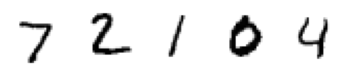

In [13]:
import matplotlib.pyplot as plt

predictions = model.predict(test_images[:5])
print("First 5 predictions", np.argmax(predictions, axis=1))
print("Actual images:")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(test_images[i].reshape((28,28)), cmap="binary")

In [14]:
# Confusion matrix
def confusion_matrix(pred, label):

    n = np.max(pred)+1
    cm = np.zeros((n,n))

    for i in range(n):

        real = np.where(label == i)[0]

        for j in range(n):
            
            cm[i,j] = len(np.where(pred[real] == j)[0])

    cm /= np.sum(cm)

    return cm

Correct predictions for Train data: 98.52%
Correct predictions for Test data: 98.41%


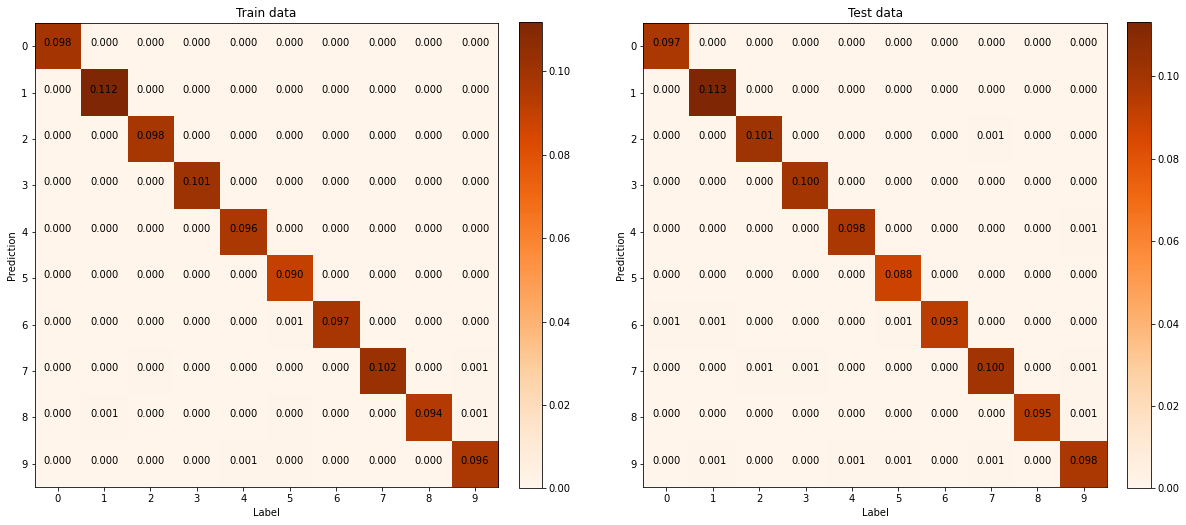

In [15]:
data_label = [[train_images, train_labels, "Train"], [test_images, test_labels, "Test"]]

import matplotlib.pyplot as plt

# Plot confusion matrix for train and test images
plt.figure(figsize=(20, 10))
for k in range(2):
    plt.subplot(1,2,k+1)
    pred = np.argmax(model.predict(data_label[k][0]), axis=1)

    cm = confusion_matrix(pred, data_label[k][1])
    print(r"Correct predictions for %s data: %.2f%%" % (data_label[k][2], np.trace(cm)*100))

    plt.imshow(cm, cmap="Oranges")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, "%.3f"%cm[i,j], ha="center")
    plt.xticks(np.unique(pred))
    plt.yticks(np.unique(data_label[k][1]))
    plt.xlabel("Label")
    plt.ylabel("Prediction")
    plt.gca().set_title("%s data" % (data_label[k][2]))
    plt.colorbar(fraction=0.046, pad=0.04)
plt.show()